# Advanced Bioinformatics Tool Benchmarking Project
## Benchmarking population structure tools PLINK2, ADMIXTURE and VCF2PCACluster
#### Documentation for tools
PLINK2: https://www.cog-genomics.org/plink/2.0/strat

ADMIXTURE: https://dalexander.github.io/admixture/download.html

VCF2PCACluster: https://github.com/hewm2008/VCF2PCACluster

### Benchmarking Python Code

Download for psutil if not already installed

In [3]:
%pip install pyarrow psutil

Note: you may need to restart the kernel to use updated packages.


Tools used for measuring run time and memory usage. 
Subprocess module is used to run command-line tools from within the Python script as if you were typing it in the terminal. Whatever you are passing to 'tool' is the command that would be run in the shell. 

#### Real data Benchmarking
#SNPs = ~50,000

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for better process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(1)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
plink2 = 'plink2 --ped real_50000.ped --map real_50000.map --pca 10 --chr-set 50 --out ~/benchmarking_project/final_project/plink2_results/real_50000_output'
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/filtered_real_50000.bed 3'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_50000.vcf -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_50000'

# Open a file to write the output
with open('benchmark_results_50000.txt', 'w') as output_file:
    output_file.write("\nBenchmarking plink2\n")
    benchmark(plink2, output_file)
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)


#SNPs = ~1.1mil

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for better process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(5)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/filtered_real_3.bed 4'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_3.vcf.gz -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_3_bench'
plink2 = 'plink2 --ped real_3.ped --map real_3.map --pca 10 --out ~/benchmarking_project/final_project/plink2_results/real_3_output'
# Open a file to write the output
with open('benchmark_results_1mil.txt', 'w') as output_file:
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)
    output_file.write("\nBenchmarking PLINK2\n")
    benchmark(plink2, output_file)


#### Truth data Benchmarking
#SNPs = ~2.3mil

In [ ]:
import time
import psutil
import subprocess

def benchmark(tool, output_file):
    # Start the process using subprocess.Popen for better process monitoring
    process = subprocess.Popen(tool, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Measure run time
    start_time = time.time()
    memory_usage = None
    # Monitor process and capture memory usage during execution
    while process.poll() is None:
        try:
            pid = process.pid
            process_info = psutil.Process(pid)
            memory_usage = process_info.memory_info().rss  # In bytes
            output_file.write(f'Memory Usage: {memory_usage / (1024 ** 2):.2f} MB\n')
        except psutil.NoSuchProcess:
            output_file.write("Process terminated before memory usage could be captured\n")
        time.sleep(0.1)  # Polling interval (adjust based on file size)
    
    end_time = time.time()
    process_time = end_time - start_time
    
    # Get output and error messages
    stdout, stderr = process.communicate()

    output_file.write(f'Execution Time: {process_time:.2f} seconds\n')
    output_file.write(f'Standard Output:\n{stdout}\n')
    output_file.write(f'Standard Error:\n{stderr}\n')
    output_file.write('----------------------------------------------------\n')

    # Returns run time, output, standard error, and memory usage
    return process_time, stdout, stderr, memory_usage

# Commands for each tool
admixture = '~/benchmarking_project/admixture/admixture/admixture ~/benchmarking_project/final_project/real_truth_4pop.bed 4'
vcf2pcacluster = '~/benchmarking_project/VCF2PCACluster/bin/VCF2PCACluster -InVCF real_truth_4pop.genotypes.vcf.gz -OutPut ~/benchmarking_project/final_project/VCF2PCACluster_results/vcf2pcacluster_real_truth_4pop'
plink2 = 'plink2 --ped real_truth_4pop.ped --map real_truth_4pop.map --pca 6 approx --out ~/benchmarking_project/final_project/plink2_results/real_truth_4pop_output'
# Open a file to write the output
with open('benchmark_results_2mil.txt', 'w') as output_file:
    output_file.write("\nBenchmarking ADMIXTURE\n")
    benchmark(admixture, output_file)
    output_file.write("\nBenchmarking VCF2PCACluster\n")
    benchmark(vcf2pcacluster, output_file)
    output_file.write("\nBenchmarking PLINK2\n")
    benchmark(plink2, output_file)


### Code for running python script in shell terminal

In [ ]:
nohup python3 benchmarking_truth.py > ~/benchmarking_project/final_project/logs/benchmarking_truth.log 2>&1 &

In [ ]:
nohup python3 benchmarking_real3.py > ~/benchmarking_project/final_project/logs/benchmarking_real3.log 2>&1 &

In [ ]:
nohup python benchmarking_50000.py > ~/benchmarking_project/final_project/logs/benchmarking_real_50000.log 2>&1 &

### Benchmarking Results

#### Results for 50,000SNPs
ADMIXTURE
Execution Time = 36.05 seconds
Memory Usage = 1.04 MB


VCF2PCACluster
Execution Time: 8.01 seconds
Memory Usage: 0.94 MB


PLINK2
Execution Time: 1.00 seconds
Memory Usage: 0.32 MB

#### Results for 1.1mil SNPs
ADMIXTURE
Execution Time = 25632.86 seconds
Memory Usage = 0.97 MB


VCF2PCACluster
Execution Time: 355.30 seconds
Memory Usage: 0.93 MB


PLINK2
Execution Time: 125.11 seconds
Memory Usage: 0.98 MB

#### Results for 2.3mil SNPs
ADMXITURE
Memory Usage: 0.94 MB
Execution Time: 26761.08 seconds


PLINK2
Memory Usage: 0.96 MB
Execution Time: 91.00 seconds, I used a parameter that makes it run faster bc i thought plink2 was dependent on snps not individuals, so may need to rerun with basic parameters since it didn't recommend running it like that


VCF2PCACluster
Memory Usage: 0.94 MB
Execution Time: 442.20 seconds

## Benchmarking Plots

#### Plotting Benchmarking for 2.3mil SNPs

/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_44990/2902484312.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_44990/2902484312.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')


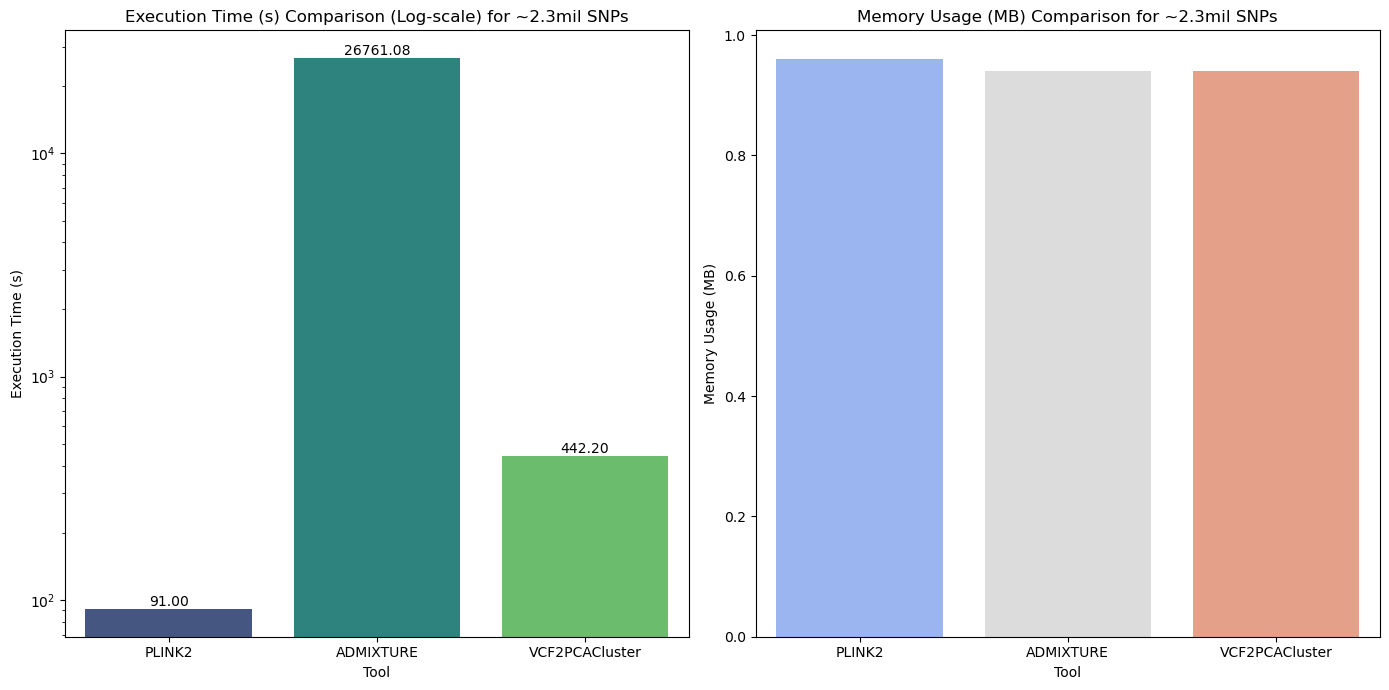

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Tool names, execution times, and memory usage values
tools = ['PLINK2', 'ADMIXTURE', 'VCF2PCACluster']
execution_times = [91.00, 26761.08, 442.20]  # times (in seconds)
memory_usage = [0.96, 0.94, 0.94]  # memory usage (in MB)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Tool': tools,
    'Execution Time (s)': execution_times,
    'Memory Usage (MB)': memory_usage
})

# Plotting Execution Time and Memory Usage
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Execution Time Plot with logarithmic scale for better visualization
sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Execution Time (s) Comparison (Log-scale) for ~2.3mil SNPs')
ax[0].set_ylabel('Execution Time (s)')
ax[0].set_yscale('log')  # Set the y-axis to logarithmic scale

# Memory Usage Plot 
sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Memory Usage (MB) Comparison for ~2.3mil SNPs')
ax[1].set_ylabel('Memory Usage (MB)')


# Annotate execution time on the bars
for i, val in enumerate(execution_times):
    ax[0].text(i, val, f'{val:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


#### Plotting Benchmarking for 50,000 SNPs

/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_54771/121372745.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_54771/121372745.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')


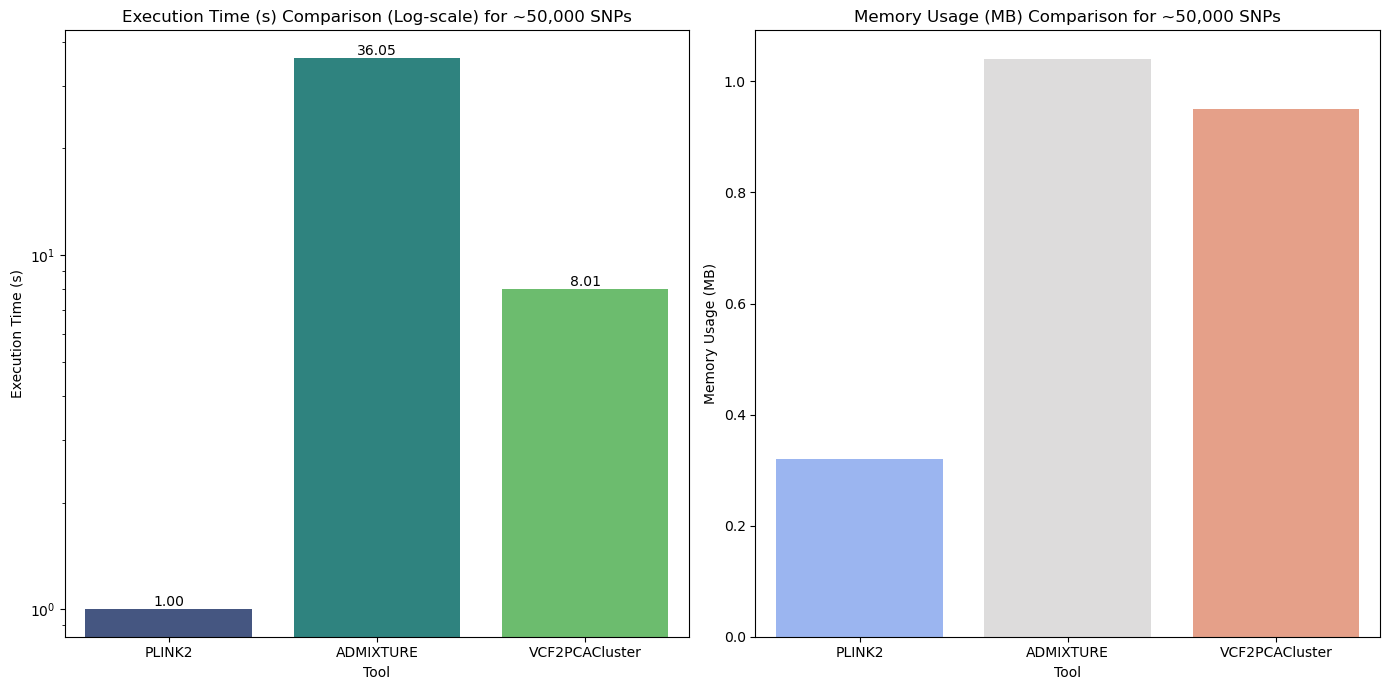

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Tool names, execution times, and memory usage values
tools = ['PLINK2', 'ADMIXTURE', 'VCF2PCACluster']
execution_times = [1.00, 36.05, 8.01]  # times (in seconds)
memory_usage = [0.32, 1.04, 0.95]  # memory usage (in MB)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Tool': tools,
    'Execution Time (s)': execution_times,
    'Memory Usage (MB)': memory_usage
})

# Plotting Execution Time and Memory Usage
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Execution Time Plot with logarithmic scale for better visualization
sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Execution Time (s) Comparison (Log-scale) for ~50,000 SNPs')
ax[0].set_ylabel('Execution Time (s)')
ax[0].set_yscale('log')  # Set the y-axis to logarithmic scale

# Memory Usage Plot 
sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Memory Usage (MB) Comparison for ~50,000 SNPs')
ax[1].set_ylabel('Memory Usage (MB)')

# Annotate execution time on the bars
for i, val in enumerate(execution_times):
    ax[0].text(i, val, f'{val:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


#### Plotting Benchmarking for 1.1mil SNPs

/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_59282/3792693783.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
/var/folders/1z/mlmsrlkj1gqd53kf4p7sjhyw0000gq/T/ipykernel_59282/3792693783.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')


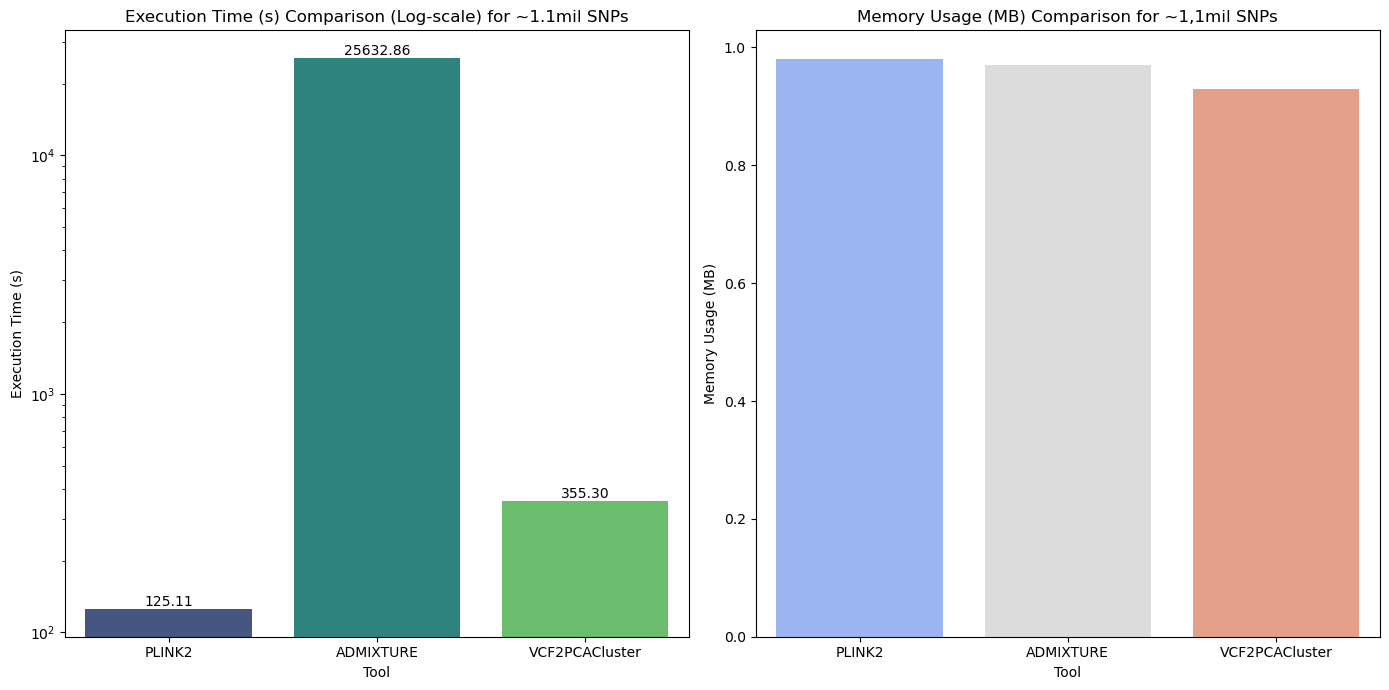

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Tool names, execution times, and memory usage values
tools = ['PLINK2', 'ADMIXTURE', 'VCF2PCACluster']
execution_times = [125.11, 25632.86, 355.30]  # times (in seconds)
memory_usage = [0.98, 0.97, 0.93]  # memory usage (in MB)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Tool': tools,
    'Execution Time (s)': execution_times,
    'Memory Usage (MB)': memory_usage
})

# Plotting Execution Time and Memory Usage
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Execution Time Plot with logarithmic scale for better visualization
sns.barplot(x='Tool', y='Execution Time (s)', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Execution Time (s) Comparison (Log-scale) for ~1.1mil SNPs')
ax[0].set_ylabel('Execution Time (s)')
ax[0].set_yscale('log')  # Set the y-axis to logarithmic scale

# Memory Usage Plot 
sns.barplot(x='Tool', y='Memory Usage (MB)', data=df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Memory Usage (MB) Comparison for ~1,1mil SNPs')
ax[1].set_ylabel('Memory Usage (MB)')

# Annotate execution time on the bars
for i, val in enumerate(execution_times):
    ax[0].text(i, val, f'{val:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## Combined Plots TBD

## Accuracy tests TBD